In [47]:
!pip install reportlab
import pandas as pd
df = pd.read_csv("bankstatements.csv")
print(df.columns)
sample = df.head(50)
print(sample)


Index(['date', 'DrCr', 'amount', 'balance', 'mode', 'name', 'Day', 'Month',
       'Year', 'Tday'],
      dtype='object')
          date DrCr    amount    balance               mode       name  Day  \
0   2022-01-01   Db  10000.00  473292.87                ATM        NaN    1   
1   2022-01-01   Db  10000.00  463292.87                ATM        NaN    1   
2   2022-01-02   Db    930.00  462362.87                UPI   AYUBRAJE    2   
3   2022-01-07   Db   2000.00  460362.87                UPI   ABUTALAH    7   
4   2022-01-10   Db   1000.00  459362.87                UPI   AGRAWALB   10   
5   2022-01-10   Db   1800.00  457562.87                UPI   GOASELEC   10   
6   2022-01-10   Db   5000.00  452562.87                UPI   GOASELEC   10   
7   2022-01-10   Db   3000.00  449562.87                UPI   AGRAWALB   10   
8   2022-01-10   Cr   2400.00  451962.87               NEFT        NaN   10   
9   2022-01-12   Cr      1.00  451963.87                UPI   NAFEESAB   12   
10  2022-

In [48]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import pandas as pd
from google.colab import files

# 1) Load your CSV
df = pd.read_csv("bankstatements.csv")
sample = df.head(50)  # first 50 rows

# 2) Making a pdf with 50 bank transactions extires
c = canvas.Canvas("bank_statement.pdf", pagesize=letter)
width, height = letter


c.setFont("Helvetica-Bold", 16)
c.drawString(50, height - 50, "Bank Statement")
c.setFont("Helvetica", 12)
c.drawString(50, height - 70, "Generated via ReportLab in Colab")

# 4) Column titles
cols = ["date", "name", "DrCr", "amount", "balance"]
x_positions = [50, 140, 320, 380, 450]
y = height - 100

c.setFont("Helvetica-Bold", 10)
for x, col in zip(x_positions, cols):
    c.drawString(x, y, col.title() if col.islower() else col)  # preserve 'DrCr' casing
y -= 15

# 5) Table rows
c.setFont("Helvetica", 9)
for _, row in sample.iterrows():
    c.drawString(x_positions[0], y, str(row["date"]))
    c.drawString(x_positions[1], y, str(row["name"])[:25])
    c.drawString(x_positions[2], y, str(row["DrCr"]))
    c.drawString(x_positions[3], y, str(row["amount"]))
    c.drawString(x_positions[4], y, str(row["balance"]))
    y -= 12
    if y < 50:
        c.showPage()
        y = height - 50

# 6) Saving and downloading the files
c.save()
files.download("bank_statement.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
# 1) install pdfplumber
!pip install pdfplumber

# 2) imports
import pdfplumber, re, pandas as pd
from google.colab import files

# 3) open the PDF and parse lines starting with YYYY‑MM‑DD
rows = []
with pdfplumber.open("bank_statement.pdf") as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        for line in text.split("\n"):
            if re.match(r"\d{4}-\d{2}-\d{2}", line):
                parts = line.strip().split()     # split on any whitespace
                if len(parts) >= 5:
                    date, name, drcr, amount, balance = parts[:5]
                    rows.append({
                        "date":        date,
                        "description": name,
                        "type":        drcr,
                        "amount":      float(amount),
                        "balance":     float(balance)
                    })

# 4) building a DataFrame and inspect
df_parsed = pd.DataFrame(rows)
print(df_parsed.head())

# 5) saving & downloading
df_parsed.to_csv("parsed_transactions.csv", index=False)
files.download("parsed_transactions.csv")


         date description type   amount    balance
0  2022-01-01         nan   Db  10000.0  473292.87
1  2022-01-01         nan   Db  10000.0  463292.87
2  2022-01-02    AYUBRAJE   Db    930.0  462362.87
3  2022-01-07    ABUTALAH   Db   2000.0  460362.87
4  2022-01-10    AGRAWALB   Db   1000.0  459362.87


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
df.to_csv("parsed_transactions.csv", index=False)
files.download("parsed_transactions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
import pandas as pd

# 1) Load
df = pd.read_csv("parsed_transactions.csv")

# 2) Rename to consistent, lowercase names
df.rename(columns={
    "DrCr": "type",
    "name": "description"
}, inplace=True)

# 3) marking the values negative for db and positive for cr
df['amount_signed'] = df.apply(
    lambda r: -r['amount'] if r['type'].lower() == 'db' else r['amount'],
    axis=1
)

# 4) Preview
print(df[['date','description','type','amount','balance','amount_signed']].head(10))



         date description type   amount    balance  amount_signed
0  2022-01-01         NaN   Db  10000.0  473292.87       -10000.0
1  2022-01-01         NaN   Db  10000.0  463292.87       -10000.0
2  2022-01-02    AYUBRAJE   Db    930.0  462362.87         -930.0
3  2022-01-07    ABUTALAH   Db   2000.0  460362.87        -2000.0
4  2022-01-10    AGRAWALB   Db   1000.0  459362.87        -1000.0
5  2022-01-10    GOASELEC   Db   1800.0  457562.87        -1800.0
6  2022-01-10    GOASELEC   Db   5000.0  452562.87        -5000.0
7  2022-01-10    AGRAWALB   Db   3000.0  449562.87        -3000.0
8  2022-01-10         NaN   Cr   2400.0  451962.87         2400.0
9  2022-01-12    NAFEESAB   Cr      1.0  451963.87            1.0


In [52]:
# defining a catogory map
category_map = {
# Retail & Shopping
    'FLIPKART':   'Shopping',
    'BUDESAHEB':  'Shopping',

    # Digital payments / wallets
    'PHONEPE':    'Digital Payments',

    # Utilities & bills
    'GOASELEC':   'Utilities',
    'STATEBAN':   'Bank Fees',

    # Income & credit
    'NAFEESAB':   'Income',

    # Salary & large transfers
    'ABDULHAME':  'Salary',

    # Rent / housing
    'ABUTALAH':   'Rent',

    # Services & misc.
    'AGRAWALB':   'Services',
    'SANGALLI':   'Services',
    'AYUBRAJE':   'Miscellaneous',
    'MAHAMMADH':  'Healthcare',
}
def categorize(desc):
    desc = str(desc).upper()
    for kw, cat in category_map.items():
        if kw in desc:
            return cat
    return 'Uncategorized'

df['category'] = df['description'].apply(categorize)
df.head(20)


,date,type,amount,balance,mode,description,Day,Month,Year,Tday,amount_signed,category
0,2022-01-01,Db,10000.00,473292.87,ATM,NaN,1,1,2022,1,-10000.00,Uncategorized
1,2022-01-01,Db,10000.00,463292.87,ATM,NaN,1,1,2022,1,-10000.00,Uncategorized
2,2022-01-02,Db,930.00,462362.87,UPI,AYUBRAJE,2,1,2022,2,-930.00,Miscellaneous
3,2022-01-07,Db,2000.00,460362.87,UPI,ABUTALAH,7,1,2022,3,-2000.00,Rent
4,2022-01-10,Db,1000.00,459362.87,UPI,AGRAWALB,10,1,2022,4,-1000.00,Services
5,2022-01-10,Db,1800.00,457562.87,UPI,GOASELEC,10,1,2022,4,-1800.00,Utilities
6,2022-01-10,Db,5000.00,452562.87,UPI,GOASELEC,10,1,2022,4,-5000.00,Utilities
7,2022-01-10,Db,3000.00,449562.87,UPI,AGRAWALB,10,1,2022,4,-3000.00,Services
8,2022-01-10,Cr,2400.00,451962.87,NEFT,NaN,10,1,2022,4,2400.00,Uncategorized
9,2022-01-12,Cr,1.00,451963.87,UPI,NAFEESAB,12,1,2022,5,1.00,Income


In [53]:
from google.colab import files

df.to_json('transactions.json', orient='records', date_format='iso')
files.download('transactions.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

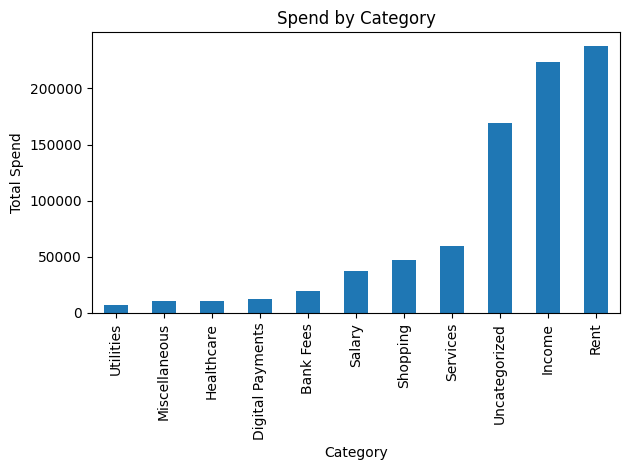

In [54]:
import matplotlib.pyplot as plt

summary = df.groupby('category')['amount_signed'].sum().abs().sort_values()
summary.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Spend')
plt.title('Spend by Category')
plt.tight_layout()
plt.show()
